# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [1]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, LayerNormalization
import os

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

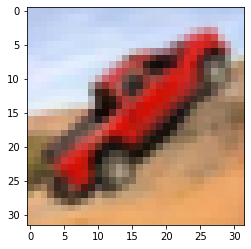

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.imshow(np.reshape(x_train[140,:],(32,32,3)))

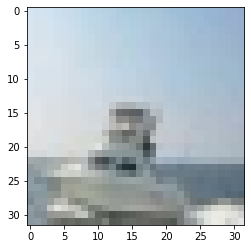

In [3]:
plt.imshow(np.reshape(x_train[100,:],(32,32,3)))

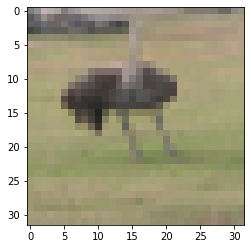

In [4]:
plt.imshow(np.reshape(x_train[42,:],(32,32,3)))

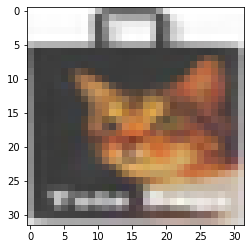

In [5]:
plt.imshow(np.reshape(x_train[3000,:],(32,32,3)))

In [14]:
inputs = keras.Input(shape=(32, 32, 3))
l1 = Rescaling(scale=1.0 / 255)(inputs)

# Apply some convolution and pooling layers
# conv, max, norm, conv, conv, max, full, full
l2 = Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(l1) # 30, 30, 256
l3 = MaxPooling2D(pool_size=(3, 3))(l2)                            # 10, 10, 256
l4 = LayerNormalization()(l3)
l5 = Conv2D(filters=384, kernel_size=(3, 3), activation="relu")(l4) # 8, 8, 384
l6 = Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(l5) # 6, 6, 256
l7 = MaxPooling2D(pool_size=(3, 3))(l6)                            # 2, 2, 256
l8 = Flatten()(l7)                                                 # 1024
#l8 = GlobalAveragePooling2D()(l6)
l9 = Dense(128, activation="relu")(l8)                             # 128
l10 = Dense(128, activation="relu")(l9)                            # 128
outputs = Dense(num_classes, activation="softmax")(l10)            # 10
#outputs = Dropout(rate=.1)(l9)

In [15]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
layer_normalization_2 (Layer (None, 10, 10, 256)       512       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 256)         8849

In [16]:
# Compile the model
model.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=[keras.metrics.CategoricalAccuracy(name="acc")])

In [17]:
import tensorflow as tf
# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
print("Fit on Dataset")
history = model.fit(dataset, epochs=10)

Fit on Dataset
Epoch 1/10
782/782 [==============================] - 138s 176ms/step - loss: 1.8409 - acc: 0.3179
Epoch 2/10
782/782 [==============================] - 142s 181ms/step - loss: 1.1301 - acc: 0.5973
Epoch 3/10
782/782 [==============================] - 142s 181ms/step - loss: 0.9190 - acc: 0.6786
Epoch 4/10
782/782 [==============================] - 142s 182ms/step - loss: 0.7922 - acc: 0.7213
Epoch 5/10
782/782 [==============================] - 143s 182ms/step - loss: 0.6907 - acc: 0.7549
Epoch 6/10
782/782 [==============================] - 143s 183ms/step - loss: 0.6284 - acc: 0.7806
Epoch 7/10
782/782 [==============================] - 143s 183ms/step - loss: 0.5717 - acc: 0.7985
Epoch 8/10
782/782 [==============================] - 143s 183ms/step - loss: 0.5035 - acc: 0.8219
Epoch 9/10
782/782 [==============================] - 143s 183ms/step - loss: 0.4568 - acc: 0.8415
Epoch 10/10
782/782 [==============================] - 144s 184ms/step - loss: 0.3939 - acc: 0

In [26]:
def build_model(hp):
    inputs = keras.Input(shape=(32, 32, 3))
    l1 = Rescaling(scale=1.0 / 255)(inputs)
    l2 = Conv2D(filters=
                hp.Int('filters', min_value=32, max_value=224, step=64), kernel_size=(3, 3), activation="relu")(l1)
    l3 = MaxPooling2D(pool_size=(3, 3))(l2)                           
    l4 = LayerNormalization()(l3)
    l5 = Conv2D(filters=384, kernel_size=(3, 3), activation="relu")(l4) 
    l6 = Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(l5)
    l7 = MaxPooling2D(pool_size=(3, 3))(l6)                            
    l8 = Flatten()(l7)    
    
    l9 = Dense(hp.Choice('mlp1', values=[128, 256, 512, 1028]), activation="relu")(l8)
    l10 = Dense(hp.Choice('mlp2', values=[128, 256, 512, 1028]), activation="relu")(l9)
    outputs = Dense(num_classes, activation="softmax")(l10)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', 
              loss="categorical_crossentropy", 
              metrics=[keras.metrics.CategoricalAccuracy(name="acc")])
    return model

In [27]:
import kerastuner
tuner = kerastuner.tuners.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    directory='tuning'
)

In [28]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

#### ***Hyperparameter Tuning is at the end***
Tuning result ...

In [30]:
models = tuner.get_best_models(num_models=2)

In [33]:
tuner.results_summary()

In [34]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(dataset, epochs=50)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [ ]:
#hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
#hypermodel.fit(dataset, epochs=best_epoch)


In [ ]:
# evaluate with test data
eval_result = hypermodel.evaluate(val_dataset)
print("[test loss, test accuracy]:", eval_result)

#### Nach Absturz des Tabs nun noch einmal "zu Fuß"

In [13]:
inputs = keras.Input(shape=(32, 32, 3))
l1 = Rescaling(scale=1.0 / 255)(inputs)
l2 = Conv2D(filters=96, kernel_size=(3, 3), activation="relu")(l1) # 30, 30, 96
l3 = MaxPooling2D(pool_size=(3, 3))(l2)                            # 10, 10, 96
l4 = LayerNormalization()(l3)
l5 = Conv2D(filters=384, kernel_size=(3, 3), activation="relu")(l4) # 8, 8, 384
l6 = Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(l5) # 6, 6, 256
l7 = MaxPooling2D(pool_size=(3, 3))(l6)                            # 2, 2, 256
l8 = Flatten()(l7)                                                 # 1024
l9 = Dense(512, activation="relu")(l8)                             # 512
l10 = Dense(512, activation="relu")(l9)                            # 512
outputs = Dense(num_classes, activation="softmax")(l10)                # 10
#outputs = Dropout(rate=.1)(l11)

In [14]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 96)        2688      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 96)        0         
_________________________________________________________________
layer_normalization_2 (Layer (None, 10, 10, 96)        192       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 384)         332160    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 256)         8849

In [15]:
# Compile the model
model.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=[keras.metrics.CategoricalAccuracy(name="acc")])

In [16]:
import tensorflow as tf
# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
print("Fit on Dataset")
history = model.fit(dataset, epochs=20)

Fit on Dataset
Epoch 1/20
782/782 [==============================] - 73s 93ms/step - loss: 1.8360 - acc: 0.3139
Epoch 2/20
782/782 [==============================] - 77s 99ms/step - loss: 1.1402 - acc: 0.5951
Epoch 3/20
782/782 [==============================] - 77s 99ms/step - loss: 0.9136 - acc: 0.6777
Epoch 4/20
782/782 [==============================] - 78s 99ms/step - loss: 0.7694 - acc: 0.7311
Epoch 5/20
782/782 [==============================] - 78s 100ms/step - loss: 0.6751 - acc: 0.7593
Epoch 6/20
782/782 [==============================] - 77s 99ms/step - loss: 0.6083 - acc: 0.7858
Epoch 7/20
782/782 [==============================] - 78s 99ms/step - loss: 0.5447 - acc: 0.8067
Epoch 8/20
782/782 [==============================] - 77s 99ms/step - loss: 0.4923 - acc: 0.8266
Epoch 9/20
782/782 [==============================] - 77s 99ms/step - loss: 0.4401 - acc: 0.8449
Epoch 10/20
782/782 [==============================] - 77s 99ms/step - loss: 0.3928 - acc: 0.8602
Epoch 11/20
7

In [17]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)
result = model.evaluate(val_dataset)

157/157 [==============================] - 3s 20ms/step - loss: 1.7795 - acc: 0.7051


#### ***Überanpassung. Dropout nutzen!***

<hr>

## Hyperparameter Tuning

In [29]:
%%time
tuner.search(dataset, validation_data=val_dataset)

Epoch 1/2
782/782 [==============================] - ETA: 6:12 - loss: 2.3664 - acc: 0.125 - ETA: 2:13 - loss: 4.4242 - acc: 0.113 - ETA: 2:11 - loss: 4.7041 - acc: 0.112 - ETA: 2:07 - loss: 4.6694 - acc: 0.107 - ETA: 2:10 - loss: 4.5665 - acc: 0.103 - ETA: 2:10 - loss: 4.4474 - acc: 0.100 - ETA: 2:10 - loss: 4.3308 - acc: 0.099 - ETA: 2:08 - loss: 4.2227 - acc: 0.099 - ETA: 2:07 - loss: 4.1244 - acc: 0.099 - ETA: 2:06 - loss: 4.0359 - acc: 0.100 - ETA: 2:05 - loss: 3.9564 - acc: 0.100 - ETA: 2:05 - loss: 3.8840 - acc: 0.101 - ETA: 2:04 - loss: 3.8185 - acc: 0.101 - ETA: 2:03 - loss: 3.7587 - acc: 0.101 - ETA: 2:02 - loss: 3.7038 - acc: 0.101 - ETA: 2:01 - loss: 3.6533 - acc: 0.101 - ETA: 2:00 - loss: 3.6065 - acc: 0.101 - ETA: 2:00 - loss: 3.5632 - acc: 0.101 - ETA: 2:00 - loss: 3.5229 - acc: 0.102 - ETA: 1:59 - loss: 3.4853 - acc: 0.102 - ETA: 1:59 - loss: 3.4501 - acc: 0.103 - ETA: 1:59 - loss: 3.4171 - acc: 0.104 - ETA: 1:59 - loss: 3.3861 - acc: 0.104 - ETA: 1:58 - loss: 3.3568 - 

Epoch 1/2
782/782 [==============================] - ETA: 6:11 - loss: 2.3221 - acc: 0.093 - ETA: 1:57 - loss: 2.4508 - acc: 0.089 - ETA: 2:02 - loss: 2.4752 - acc: 0.087 - ETA: 2:07 - loss: 2.4790 - acc: 0.090 - ETA: 2:15 - loss: 2.4767 - acc: 0.094 - ETA: 2:18 - loss: 2.4709 - acc: 0.095 - ETA: 2:19 - loss: 2.4638 - acc: 0.097 - ETA: 2:18 - loss: 2.4566 - acc: 0.099 - ETA: 2:18 - loss: 2.4501 - acc: 0.100 - ETA: 2:18 - loss: 2.4434 - acc: 0.101 - ETA: 2:17 - loss: 2.4373 - acc: 0.102 - ETA: 2:17 - loss: 2.4315 - acc: 0.103 - ETA: 2:16 - loss: 2.4262 - acc: 0.104 - ETA: 2:16 - loss: 2.4214 - acc: 0.104 - ETA: 2:15 - loss: 2.4167 - acc: 0.105 - ETA: 2:14 - loss: 2.4121 - acc: 0.106 - ETA: 2:14 - loss: 2.4075 - acc: 0.108 - ETA: 2:14 - loss: 2.4033 - acc: 0.109 - ETA: 2:15 - loss: 2.3990 - acc: 0.110 - ETA: 2:15 - loss: 2.3946 - acc: 0.111 - ETA: 2:15 - loss: 2.3903 - acc: 0.112 - ETA: 2:15 - loss: 2.3859 - acc: 0.114 - ETA: 2:14 - loss: 2.3818 - acc: 0.115 - ETA: 2:14 - loss: 2.3780 - 

Epoch 1/2
782/782 [==============================] - ETA: 5:46 - loss: 2.3544 - acc: 0.078 - ETA: 1:33 - loss: 2.7022 - acc: 0.078 - ETA: 1:35 - loss: 2.8304 - acc: 0.074 - ETA: 1:36 - loss: 2.8967 - acc: 0.071 - ETA: 1:38 - loss: 2.9106 - acc: 0.070 - ETA: 1:39 - loss: 2.9064 - acc: 0.070 - ETA: 1:40 - loss: 2.8924 - acc: 0.071 - ETA: 1:39 - loss: 2.8736 - acc: 0.073 - ETA: 1:41 - loss: 2.8535 - acc: 0.075 - ETA: 1:42 - loss: 2.8335 - acc: 0.078 - ETA: 1:42 - loss: 2.8146 - acc: 0.080 - ETA: 1:41 - loss: 2.7966 - acc: 0.081 - ETA: 1:42 - loss: 2.7799 - acc: 0.083 - ETA: 1:42 - loss: 2.7643 - acc: 0.084 - ETA: 1:42 - loss: 2.7496 - acc: 0.085 - ETA: 1:42 - loss: 2.7358 - acc: 0.086 - ETA: 1:42 - loss: 2.7228 - acc: 0.086 - ETA: 1:42 - loss: 2.7106 - acc: 0.087 - ETA: 1:41 - loss: 2.6991 - acc: 0.088 - ETA: 1:42 - loss: 2.6881 - acc: 0.088 - ETA: 1:42 - loss: 2.6777 - acc: 0.089 - ETA: 1:42 - loss: 2.6678 - acc: 0.090 - ETA: 1:42 - loss: 2.6585 - acc: 0.091 - ETA: 1:41 - loss: 2.6496 - 

Epoch 1/2
782/782 [==============================] - ETA: 5:49 - loss: 2.2825 - acc: 0.187 - ETA: 1:42 - loss: 2.5064 - acc: 0.160 - ETA: 1:47 - loss: 2.6548 - acc: 0.145 - ETA: 1:49 - loss: 2.7164 - acc: 0.139 - ETA: 1:51 - loss: 2.7433 - acc: 0.133 - ETA: 1:51 - loss: 2.7472 - acc: 0.127 - ETA: 1:51 - loss: 2.7410 - acc: 0.123 - ETA: 1:52 - loss: 2.7307 - acc: 0.120 - ETA: 1:52 - loss: 2.7185 - acc: 0.117 - ETA: 1:51 - loss: 2.7060 - acc: 0.115 - ETA: 1:52 - loss: 2.6937 - acc: 0.113 - ETA: 1:52 - loss: 2.6813 - acc: 0.112 - ETA: 1:53 - loss: 2.6695 - acc: 0.111 - ETA: 1:53 - loss: 2.6585 - acc: 0.110 - ETA: 1:54 - loss: 2.6478 - acc: 0.110 - ETA: 1:54 - loss: 2.6374 - acc: 0.110 - ETA: 1:54 - loss: 2.6276 - acc: 0.110 - ETA: 1:55 - loss: 2.6184 - acc: 0.110 - ETA: 1:56 - loss: 2.6096 - acc: 0.110 - ETA: 1:56 - loss: 2.6010 - acc: 0.110 - ETA: 1:57 - loss: 2.5929 - acc: 0.111 - ETA: 1:57 - loss: 2.5851 - acc: 0.111 - ETA: 1:57 - loss: 2.5776 - acc: 0.112 - ETA: 1:57 - loss: 2.5704 - 

Epoch 1/2
782/782 [==============================] - ETA: 5:14 - loss: 2.3073 - acc: 0.078 - ETA: 51s - loss: 2.4078 - acc: 0.078 - ETA: 51s - loss: 2.4315 - acc: 0.08 - ETA: 52s - loss: 2.4339 - acc: 0.08 - ETA: 53s - loss: 2.4329 - acc: 0.08 - ETA: 54s - loss: 2.4289 - acc: 0.08 - ETA: 56s - loss: 2.4243 - acc: 0.08 - ETA: 56s - loss: 2.4189 - acc: 0.08 - ETA: 57s - loss: 2.4139 - acc: 0.08 - ETA: 57s - loss: 2.4089 - acc: 0.08 - ETA: 57s - loss: 2.4042 - acc: 0.08 - ETA: 58s - loss: 2.3998 - acc: 0.08 - ETA: 58s - loss: 2.3959 - acc: 0.08 - ETA: 58s - loss: 2.3924 - acc: 0.08 - ETA: 58s - loss: 2.3889 - acc: 0.09 - ETA: 58s - loss: 2.3855 - acc: 0.09 - ETA: 58s - loss: 2.3822 - acc: 0.09 - ETA: 58s - loss: 2.3790 - acc: 0.09 - ETA: 58s - loss: 2.3758 - acc: 0.09 - ETA: 58s - loss: 2.3726 - acc: 0.09 - ETA: 58s - loss: 2.3694 - acc: 0.10 - ETA: 58s - loss: 2.3662 - acc: 0.10 - ETA: 58s - loss: 2.3632 - acc: 0.10 - ETA: 58s - loss: 2.3602 - acc: 0.10 - ETA: 58s - loss: 2.3574 - acc: 0

Epoch 1/2
782/782 [==============================] - ETA: 6:12 - loss: 2.3044 - acc: 0.140 - ETA: 2:04 - loss: 4.0580 - acc: 0.125 - ETA: 2:12 - loss: 4.3727 - acc: 0.121 - ETA: 2:13 - loss: 4.3657 - acc: 0.119 - ETA: 2:14 - loss: 4.2928 - acc: 0.116 - ETA: 2:15 - loss: 4.2003 - acc: 0.113 - ETA: 2:15 - loss: 4.1053 - acc: 0.112 - ETA: 2:16 - loss: 4.0164 - acc: 0.111 - ETA: 2:16 - loss: 3.9341 - acc: 0.110 - ETA: 2:16 - loss: 3.8588 - acc: 0.111 - ETA: 2:17 - loss: 3.7905 - acc: 0.110 - ETA: 2:16 - loss: 3.7278 - acc: 0.110 - ETA: 2:16 - loss: 3.6708 - acc: 0.110 - ETA: 2:16 - loss: 3.6186 - acc: 0.110 - ETA: 2:16 - loss: 3.5706 - acc: 0.110 - ETA: 2:16 - loss: 3.5262 - acc: 0.110 - ETA: 2:16 - loss: 3.4851 - acc: 0.110 - ETA: 2:16 - loss: 3.4470 - acc: 0.110 - ETA: 2:16 - loss: 3.4116 - acc: 0.110 - ETA: 2:15 - loss: 3.3784 - acc: 0.110 - ETA: 2:15 - loss: 3.3474 - acc: 0.111 - ETA: 2:15 - loss: 3.3182 - acc: 0.111 - ETA: 2:15 - loss: 3.2909 - acc: 0.111 - ETA: 2:15 - loss: 3.2652 - 

Epoch 1/2
782/782 [==============================] - ETA: 5:39 - loss: 2.3012 - acc: 0.078 - ETA: 1:34 - loss: 3.1862 - acc: 0.078 - ETA: 1:34 - loss: 3.3727 - acc: 0.079 - ETA: 1:36 - loss: 3.4085 - acc: 0.080 - ETA: 1:38 - loss: 3.3829 - acc: 0.081 - ETA: 1:39 - loss: 3.3387 - acc: 0.082 - ETA: 1:40 - loss: 3.2904 - acc: 0.083 - ETA: 1:40 - loss: 3.2434 - acc: 0.085 - ETA: 1:40 - loss: 3.1999 - acc: 0.086 - ETA: 1:41 - loss: 3.1596 - acc: 0.087 - ETA: 1:41 - loss: 3.1228 - acc: 0.088 - ETA: 1:41 - loss: 3.0891 - acc: 0.089 - ETA: 1:41 - loss: 3.0580 - acc: 0.090 - ETA: 1:41 - loss: 3.0294 - acc: 0.091 - ETA: 1:41 - loss: 3.0030 - acc: 0.092 - ETA: 1:41 - loss: 2.9786 - acc: 0.094 - ETA: 1:41 - loss: 2.9558 - acc: 0.095 - ETA: 1:41 - loss: 2.9346 - acc: 0.096 - ETA: 1:41 - loss: 2.9147 - acc: 0.097 - ETA: 1:41 - loss: 2.8960 - acc: 0.098 - ETA: 1:41 - loss: 2.8785 - acc: 0.099 - ETA: 1:41 - loss: 2.8620 - acc: 0.101 - ETA: 1:40 - loss: 2.8463 - acc: 0.102 - ETA: 1:40 - loss: 2.8315 - 

Epoch 1/2
782/782 [==============================] - ETA: 5:45 - loss: 2.3785 - acc: 0.140 - ETA: 1:31 - loss: 3.5111 - acc: 0.125 - ETA: 1:34 - loss: 3.7651 - acc: 0.121 - ETA: 1:38 - loss: 3.7799 - acc: 0.115 - ETA: 1:40 - loss: 3.7354 - acc: 0.110 - ETA: 1:40 - loss: 3.6721 - acc: 0.107 - ETA: 1:41 - loss: 3.6056 - acc: 0.104 - ETA: 1:42 - loss: 3.5425 - acc: 0.103 - ETA: 1:42 - loss: 3.4838 - acc: 0.102 - ETA: 1:42 - loss: 3.4300 - acc: 0.102 - ETA: 1:42 - loss: 3.3816 - acc: 0.101 - ETA: 1:42 - loss: 3.3369 - acc: 0.100 - ETA: 1:42 - loss: 3.2965 - acc: 0.100 - ETA: 1:42 - loss: 3.2595 - acc: 0.099 - ETA: 1:42 - loss: 3.2253 - acc: 0.099 - ETA: 1:42 - loss: 3.1936 - acc: 0.098 - ETA: 1:42 - loss: 3.1643 - acc: 0.098 - ETA: 1:42 - loss: 3.1370 - acc: 0.097 - ETA: 1:42 - loss: 3.1116 - acc: 0.097 - ETA: 1:42 - loss: 3.0877 - acc: 0.097 - ETA: 1:42 - loss: 3.0655 - acc: 0.097 - ETA: 1:42 - loss: 3.0446 - acc: 0.097 - ETA: 1:42 - loss: 3.0250 - acc: 0.097 - ETA: 1:42 - loss: 3.0065 - 

Epoch 1/2
782/782 [==============================] - ETA: 5:16 - loss: 2.3911 - acc: 0.046 - ETA: 1:06 - loss: 2.6909 - acc: 0.054 - ETA: 1:08 - loss: 2.8152 - acc: 0.060 - ETA: 1:10 - loss: 2.8431 - acc: 0.068 - ETA: 1:12 - loss: 2.8395 - acc: 0.071 - ETA: 1:14 - loss: 2.8248 - acc: 0.073 - ETA: 1:15 - loss: 2.8057 - acc: 0.075 - ETA: 1:15 - loss: 2.7848 - acc: 0.077 - ETA: 1:16 - loss: 2.7648 - acc: 0.079 - ETA: 1:16 - loss: 2.7458 - acc: 0.080 - ETA: 1:16 - loss: 2.7281 - acc: 0.080 - ETA: 1:16 - loss: 2.7115 - acc: 0.081 - ETA: 1:16 - loss: 2.6960 - acc: 0.082 - ETA: 1:16 - loss: 2.6819 - acc: 0.083 - ETA: 1:17 - loss: 2.6686 - acc: 0.084 - ETA: 1:17 - loss: 2.6562 - acc: 0.085 - ETA: 1:17 - loss: 2.6444 - acc: 0.087 - ETA: 1:17 - loss: 2.6335 - acc: 0.089 - ETA: 1:17 - loss: 2.6231 - acc: 0.090 - ETA: 1:17 - loss: 2.6131 - acc: 0.092 - ETA: 1:17 - loss: 2.6038 - acc: 0.093 - ETA: 1:17 - loss: 2.5948 - acc: 0.095 - ETA: 1:17 - loss: 2.5862 - acc: 0.096 - ETA: 1:17 - loss: 2.5780 - 

Epoch 1/2
782/782 [==============================] - ETA: 5:24 - loss: 2.3949 - acc: 0.015 - ETA: 1:11 - loss: 2.4719 - acc: 0.031 - ETA: 1:11 - loss: 2.4949 - acc: 0.043 - ETA: 1:13 - loss: 2.4949 - acc: 0.050 - ETA: 1:15 - loss: 2.5000 - acc: 0.053 - ETA: 1:16 - loss: 2.4983 - acc: 0.057 - ETA: 1:17 - loss: 2.4937 - acc: 0.059 - ETA: 1:17 - loss: 2.4880 - acc: 0.062 - ETA: 1:18 - loss: 2.4818 - acc: 0.064 - ETA: 1:18 - loss: 2.4755 - acc: 0.066 - ETA: 1:18 - loss: 2.4696 - acc: 0.068 - ETA: 1:18 - loss: 2.4638 - acc: 0.070 - ETA: 1:18 - loss: 2.4585 - acc: 0.071 - ETA: 1:18 - loss: 2.4536 - acc: 0.072 - ETA: 1:18 - loss: 2.4489 - acc: 0.073 - ETA: 1:18 - loss: 2.4442 - acc: 0.075 - ETA: 1:18 - loss: 2.4398 - acc: 0.076 - ETA: 1:18 - loss: 2.4356 - acc: 0.078 - ETA: 1:18 - loss: 2.4316 - acc: 0.079 - ETA: 1:18 - loss: 2.4276 - acc: 0.080 - ETA: 1:18 - loss: 2.4236 - acc: 0.081 - ETA: 1:18 - loss: 2.4196 - acc: 0.082 - ETA: 1:18 - loss: 2.4158 - acc: 0.084 - ETA: 1:18 - loss: 2.4122 - 

Epoch 1/2
782/782 [==============================] - ETA: 5:39 - loss: 2.3669 - acc: 0.062 - ETA: 1:28 - loss: 2.4075 - acc: 0.093 - ETA: 1:35 - loss: 2.4349 - acc: 0.099 - ETA: 1:36 - loss: 2.4443 - acc: 0.096 - ETA: 1:37 - loss: 2.4522 - acc: 0.094 - ETA: 1:38 - loss: 2.4545 - acc: 0.092 - ETA: 1:38 - loss: 2.4525 - acc: 0.092 - ETA: 1:38 - loss: 2.4502 - acc: 0.091 - ETA: 1:39 - loss: 2.4467 - acc: 0.091 - ETA: 1:39 - loss: 2.4428 - acc: 0.093 - ETA: 1:39 - loss: 2.4388 - acc: 0.094 - ETA: 1:39 - loss: 2.4346 - acc: 0.096 - ETA: 1:39 - loss: 2.4305 - acc: 0.097 - ETA: 1:39 - loss: 2.4266 - acc: 0.097 - ETA: 1:39 - loss: 2.4226 - acc: 0.098 - ETA: 1:39 - loss: 2.4186 - acc: 0.100 - ETA: 1:39 - loss: 2.4145 - acc: 0.101 - ETA: 1:39 - loss: 2.4106 - acc: 0.102 - ETA: 1:38 - loss: 2.4067 - acc: 0.103 - ETA: 1:38 - loss: 2.4026 - acc: 0.104 - ETA: 1:38 - loss: 2.3984 - acc: 0.106 - ETA: 1:38 - loss: 2.3943 - acc: 0.107 - ETA: 1:38 - loss: 2.3902 - acc: 0.108 - ETA: 1:38 - loss: 2.3863 - 

Epoch 1/2
782/782 [==============================] - ETA: 5:20 - loss: 2.2954 - acc: 0.109 - ETA: 1:08 - loss: 2.6734 - acc: 0.101 - ETA: 1:09 - loss: 2.8335 - acc: 0.102 - ETA: 1:12 - loss: 2.8762 - acc: 0.111 - ETA: 1:16 - loss: 2.8833 - acc: 0.113 - ETA: 1:19 - loss: 2.8716 - acc: 0.113 - ETA: 1:21 - loss: 2.8528 - acc: 0.113 - ETA: 1:20 - loss: 2.8320 - acc: 0.114 - ETA: 1:21 - loss: 2.8110 - acc: 0.114 - ETA: 1:20 - loss: 2.7908 - acc: 0.114 - ETA: 1:20 - loss: 2.7728 - acc: 0.114 - ETA: 1:20 - loss: 2.7557 - acc: 0.114 - ETA: 1:20 - loss: 2.7396 - acc: 0.114 - ETA: 1:20 - loss: 2.7248 - acc: 0.113 - ETA: 1:20 - loss: 2.7108 - acc: 0.113 - ETA: 1:20 - loss: 2.6976 - acc: 0.113 - ETA: 1:20 - loss: 2.6853 - acc: 0.113 - ETA: 1:20 - loss: 2.6737 - acc: 0.113 - ETA: 1:20 - loss: 2.6628 - acc: 0.113 - ETA: 1:19 - loss: 2.6524 - acc: 0.113 - ETA: 1:19 - loss: 2.6427 - acc: 0.113 - ETA: 1:19 - loss: 2.6335 - acc: 0.113 - ETA: 1:19 - loss: 2.6247 - acc: 0.113 - ETA: 1:19 - loss: 2.6164 - 

Epoch 3/4
782/782 [==============================] - ETA: 5:19 - loss: 2.4308 - acc: 0.062 - ETA: 1:07 - loss: 2.6728 - acc: 0.093 - ETA: 1:10 - loss: 2.7895 - acc: 0.104 - ETA: 1:13 - loss: 2.8086 - acc: 0.104 - ETA: 1:15 - loss: 2.8000 - acc: 0.103 - ETA: 1:17 - loss: 2.7833 - acc: 0.101 - ETA: 1:17 - loss: 2.7648 - acc: 0.100 - ETA: 1:17 - loss: 2.7457 - acc: 0.100 - ETA: 1:18 - loss: 2.7278 - acc: 0.101 - ETA: 1:18 - loss: 2.7107 - acc: 0.101 - ETA: 1:18 - loss: 2.6946 - acc: 0.101 - ETA: 1:19 - loss: 2.6796 - acc: 0.101 - ETA: 1:19 - loss: 2.6657 - acc: 0.102 - ETA: 1:19 - loss: 2.6530 - acc: 0.102 - ETA: 1:20 - loss: 2.6412 - acc: 0.102 - ETA: 1:19 - loss: 2.6303 - acc: 0.102 - ETA: 1:19 - loss: 2.6201 - acc: 0.102 - ETA: 1:19 - loss: 2.6105 - acc: 0.102 - ETA: 1:19 - loss: 2.6015 - acc: 0.102 - ETA: 1:19 - loss: 2.5931 - acc: 0.102 - ETA: 1:19 - loss: 2.5852 - acc: 0.103 - ETA: 1:19 - loss: 2.5777 - acc: 0.103 - ETA: 1:19 - loss: 2.5706 - acc: 0.103 - ETA: 1:19 - loss: 2.5640 - 

Epoch 3/4
782/782 [==============================] - ETA: 5:02 - loss: 2.3241 - acc: 0.109 - ETA: 53s - loss: 2.3528 - acc: 0.101 - ETA: 54s - loss: 2.3693 - acc: 0.09 - ETA: 54s - loss: 2.3732 - acc: 0.09 - ETA: 55s - loss: 2.3751 - acc: 0.09 - ETA: 56s - loss: 2.3740 - acc: 0.08 - ETA: 56s - loss: 2.3727 - acc: 0.08 - ETA: 57s - loss: 2.3704 - acc: 0.08 - ETA: 58s - loss: 2.3677 - acc: 0.08 - ETA: 58s - loss: 2.3646 - acc: 0.09 - ETA: 58s - loss: 2.3620 - acc: 0.09 - ETA: 59s - loss: 2.3593 - acc: 0.09 - ETA: 59s - loss: 2.3569 - acc: 0.09 - ETA: 59s - loss: 2.3548 - acc: 0.09 - ETA: 59s - loss: 2.3525 - acc: 0.09 - ETA: 59s - loss: 2.3501 - acc: 0.09 - ETA: 59s - loss: 2.3475 - acc: 0.09 - ETA: 59s - loss: 2.3449 - acc: 0.09 - ETA: 58s - loss: 2.3425 - acc: 0.10 - ETA: 58s - loss: 2.3400 - acc: 0.10 - ETA: 58s - loss: 2.3375 - acc: 0.10 - ETA: 58s - loss: 2.3347 - acc: 0.10 - ETA: 59s - loss: 2.3320 - acc: 0.10 - ETA: 59s - loss: 2.3294 - acc: 0.10 - ETA: 59s - loss: 2.3269 - acc: 0

Epoch 3/4
782/782 [==============================] - ETA: 6:38 - loss: 2.3599 - acc: 0.078 - ETA: 2:25 - loss: 2.4491 - acc: 0.078 - ETA: 2:28 - loss: 2.4605 - acc: 0.079 - ETA: 2:29 - loss: 2.4624 - acc: 0.078 - ETA: 2:27 - loss: 2.4663 - acc: 0.077 - ETA: 2:32 - loss: 2.4668 - acc: 0.077 - ETA: 2:30 - loss: 2.4645 - acc: 0.079 - ETA: 2:29 - loss: 2.4608 - acc: 0.081 - ETA: 2:28 - loss: 2.4564 - acc: 0.082 - ETA: 2:27 - loss: 2.4516 - acc: 0.083 - ETA: 2:25 - loss: 2.4473 - acc: 0.083 - ETA: 2:24 - loss: 2.4428 - acc: 0.083 - ETA: 2:24 - loss: 2.4387 - acc: 0.084 - ETA: 2:23 - loss: 2.4349 - acc: 0.084 - ETA: 2:22 - loss: 2.4311 - acc: 0.085 - ETA: 2:22 - loss: 2.4276 - acc: 0.086 - ETA: 2:21 - loss: 2.4241 - acc: 0.087 - ETA: 2:21 - loss: 2.4209 - acc: 0.088 - ETA: 2:20 - loss: 2.4177 - acc: 0.089 - ETA: 2:20 - loss: 2.4146 - acc: 0.090 - ETA: 2:20 - loss: 2.4117 - acc: 0.092 - ETA: 2:20 - loss: 2.4088 - acc: 0.092 - ETA: 2:21 - loss: 2.4061 - acc: 0.093 - ETA: 2:21 - loss: 2.4035 - 

Epoch 3/4
782/782 [==============================] - ETA: 5:36 - loss: 2.3945 - acc: 0.093 - ETA: 1:29 - loss: 3.0287 - acc: 0.089 - ETA: 1:34 - loss: 3.2459 - acc: 0.092 - ETA: 1:36 - loss: 3.2822 - acc: 0.095 - ETA: 1:39 - loss: 3.2730 - acc: 0.094 - ETA: 1:40 - loss: 3.2410 - acc: 0.095 - ETA: 1:41 - loss: 3.2023 - acc: 0.097 - ETA: 1:41 - loss: 3.1632 - acc: 0.098 - ETA: 1:42 - loss: 3.1257 - acc: 0.098 - ETA: 1:41 - loss: 3.0903 - acc: 0.098 - ETA: 1:41 - loss: 3.0577 - acc: 0.098 - ETA: 1:41 - loss: 3.0274 - acc: 0.098 - ETA: 1:41 - loss: 2.9998 - acc: 0.098 - ETA: 1:41 - loss: 2.9743 - acc: 0.098 - ETA: 1:41 - loss: 2.9506 - acc: 0.099 - ETA: 1:41 - loss: 2.9286 - acc: 0.099 - ETA: 1:41 - loss: 2.9081 - acc: 0.100 - ETA: 1:41 - loss: 2.8889 - acc: 0.100 - ETA: 1:41 - loss: 2.8709 - acc: 0.101 - ETA: 1:41 - loss: 2.8539 - acc: 0.101 - ETA: 1:41 - loss: 2.8379 - acc: 0.102 - ETA: 1:41 - loss: 2.8226 - acc: 0.102 - ETA: 1:41 - loss: 2.8082 - acc: 0.103 - ETA: 1:41 - loss: 2.7946 - 

Epoch 5/10
782/782 [==============================] - ETA: 5:14 - loss: 2.2911 - acc: 0.062 - ETA: 46s - loss: 2.3555 - acc: 0.066 - ETA: 51s - loss: 2.3788 - acc: 0.06 - ETA: 51s - loss: 2.3896 - acc: 0.06 - ETA: 52s - loss: 2.3947 - acc: 0.06 - ETA: 53s - loss: 2.3951 - acc: 0.06 - ETA: 55s - loss: 2.3937 - acc: 0.07 - ETA: 55s - loss: 2.3908 - acc: 0.07 - ETA: 56s - loss: 2.3876 - acc: 0.07 - ETA: 56s - loss: 2.3845 - acc: 0.07 - ETA: 56s - loss: 2.3815 - acc: 0.07 - ETA: 57s - loss: 2.3783 - acc: 0.07 - ETA: 57s - loss: 2.3753 - acc: 0.08 - ETA: 57s - loss: 2.3724 - acc: 0.08 - ETA: 57s - loss: 2.3695 - acc: 0.08 - ETA: 57s - loss: 2.3664 - acc: 0.08 - ETA: 57s - loss: 2.3632 - acc: 0.08 - ETA: 57s - loss: 2.3600 - acc: 0.08 - ETA: 57s - loss: 2.3568 - acc: 0.09 - ETA: 57s - loss: 2.3534 - acc: 0.09 - ETA: 57s - loss: 2.3501 - acc: 0.09 - ETA: 57s - loss: 2.3467 - acc: 0.09 - ETA: 58s - loss: 2.3433 - acc: 0.09 - ETA: 58s - loss: 2.3402 - acc: 0.09 - ETA: 58s - loss: 2.3370 - acc: 

Epoch 5/10
782/782 [==============================] - ETA: 5:47 - loss: 2.3915 - acc: 0.140 - ETA: 1:19 - loss: 2.6954 - acc: 0.125 - ETA: 1:21 - loss: 2.7394 - acc: 0.118 - ETA: 1:23 - loss: 2.7461 - acc: 0.110 - ETA: 1:24 - loss: 2.7347 - acc: 0.104 - ETA: 1:24 - loss: 2.7181 - acc: 0.100 - ETA: 1:24 - loss: 2.6996 - acc: 0.098 - ETA: 1:24 - loss: 2.6806 - acc: 0.097 - ETA: 1:24 - loss: 2.6632 - acc: 0.096 - ETA: 1:25 - loss: 2.6470 - acc: 0.096 - ETA: 1:25 - loss: 2.6322 - acc: 0.095 - ETA: 1:24 - loss: 2.6185 - acc: 0.095 - ETA: 1:24 - loss: 2.6058 - acc: 0.096 - ETA: 1:24 - loss: 2.5941 - acc: 0.096 - ETA: 1:24 - loss: 2.5831 - acc: 0.097 - ETA: 1:24 - loss: 2.5727 - acc: 0.097 - ETA: 1:24 - loss: 2.5627 - acc: 0.098 - ETA: 1:24 - loss: 2.5534 - acc: 0.098 - ETA: 1:24 - loss: 2.5444 - acc: 0.099 - ETA: 1:24 - loss: 2.5357 - acc: 0.100 - ETA: 1:24 - loss: 2.5275 - acc: 0.102 - ETA: 1:24 - loss: 2.5194 - acc: 0.103 - ETA: 1:23 - loss: 2.5120 - acc: 0.104 - ETA: 1:23 - loss: 2.5050 -

Epoch 1/4
782/782 [==============================] - ETA: 6:11 - loss: 2.3754 - acc: 0.093 - ETA: 1:32 - loss: 2.3569 - acc: 0.121 - ETA: 1:36 - loss: 2.3780 - acc: 0.127 - ETA: 1:38 - loss: 2.3841 - acc: 0.127 - ETA: 1:35 - loss: 2.3970 - acc: 0.128 - ETA: 1:35 - loss: 2.4034 - acc: 0.127 - ETA: 1:35 - loss: 2.4052 - acc: 0.127 - ETA: 1:35 - loss: 2.4052 - acc: 0.128 - ETA: 1:35 - loss: 2.4042 - acc: 0.128 - ETA: 1:35 - loss: 2.4031 - acc: 0.128 - ETA: 1:34 - loss: 2.4012 - acc: 0.129 - ETA: 1:34 - loss: 2.3989 - acc: 0.130 - ETA: 1:34 - loss: 2.3967 - acc: 0.131 - ETA: 1:34 - loss: 2.3945 - acc: 0.132 - ETA: 1:33 - loss: 2.3922 - acc: 0.132 - ETA: 1:33 - loss: 2.3900 - acc: 0.132 - ETA: 1:33 - loss: 2.3876 - acc: 0.133 - ETA: 1:33 - loss: 2.3853 - acc: 0.134 - ETA: 1:33 - loss: 2.3830 - acc: 0.134 - ETA: 1:32 - loss: 2.3805 - acc: 0.134 - ETA: 1:32 - loss: 2.3781 - acc: 0.135 - ETA: 1:32 - loss: 2.3758 - acc: 0.135 - ETA: 1:32 - loss: 2.3734 - acc: 0.135 - ETA: 1:32 - loss: 2.3712 - 

Epoch 1/4
782/782 [==============================] - ETA: 6:00 - loss: 2.3100 - acc: 0.046 - ETA: 1:11 - loss: 2.3178 - acc: 0.054 - ETA: 1:13 - loss: 2.3269 - acc: 0.064 - ETA: 1:13 - loss: 2.3273 - acc: 0.069 - ETA: 1:12 - loss: 2.3285 - acc: 0.072 - ETA: 1:13 - loss: 2.3285 - acc: 0.077 - ETA: 1:13 - loss: 2.3282 - acc: 0.081 - ETA: 1:13 - loss: 2.3274 - acc: 0.086 - ETA: 1:13 - loss: 2.3269 - acc: 0.088 - ETA: 1:13 - loss: 2.3262 - acc: 0.091 - ETA: 1:13 - loss: 2.3255 - acc: 0.093 - ETA: 1:13 - loss: 2.3248 - acc: 0.095 - ETA: 1:13 - loss: 2.3241 - acc: 0.096 - ETA: 1:13 - loss: 2.3236 - acc: 0.098 - ETA: 1:13 - loss: 2.3229 - acc: 0.099 - ETA: 1:13 - loss: 2.3222 - acc: 0.100 - ETA: 1:12 - loss: 2.3215 - acc: 0.102 - ETA: 1:12 - loss: 2.3207 - acc: 0.103 - ETA: 1:12 - loss: 2.3199 - acc: 0.105 - ETA: 1:12 - loss: 2.3189 - acc: 0.106 - ETA: 1:12 - loss: 2.3179 - acc: 0.107 - ETA: 1:12 - loss: 2.3168 - acc: 0.108 - ETA: 1:13 - loss: 2.3157 - acc: 0.110 - ETA: 1:13 - loss: 2.3146 - 

Epoch 1/4
782/782 [==============================] - ETA: 6:01 - loss: 2.3397 - acc: 0.187 - ETA: 1:41 - loss: 2.4980 - acc: 0.160 - ETA: 1:44 - loss: 2.6091 - acc: 0.150 - ETA: 1:46 - loss: 2.6387 - acc: 0.144 - ETA: 1:46 - loss: 2.6430 - acc: 0.140 - ETA: 1:47 - loss: 2.6396 - acc: 0.136 - ETA: 1:47 - loss: 2.6327 - acc: 0.132 - ETA: 1:47 - loss: 2.6231 - acc: 0.128 - ETA: 1:47 - loss: 2.6130 - acc: 0.126 - ETA: 1:47 - loss: 2.6024 - acc: 0.124 - ETA: 1:47 - loss: 2.5924 - acc: 0.121 - ETA: 1:47 - loss: 2.5826 - acc: 0.119 - ETA: 1:47 - loss: 2.5737 - acc: 0.117 - ETA: 1:47 - loss: 2.5653 - acc: 0.116 - ETA: 1:47 - loss: 2.5573 - acc: 0.114 - ETA: 1:47 - loss: 2.5497 - acc: 0.113 - ETA: 1:47 - loss: 2.5425 - acc: 0.112 - ETA: 1:47 - loss: 2.5356 - acc: 0.111 - ETA: 1:46 - loss: 2.5291 - acc: 0.110 - ETA: 1:46 - loss: 2.5228 - acc: 0.110 - ETA: 1:46 - loss: 2.5169 - acc: 0.110 - ETA: 1:46 - loss: 2.5112 - acc: 0.110 - ETA: 1:46 - loss: 2.5057 - acc: 0.109 - ETA: 1:45 - loss: 2.5006 - 

Epoch 1/4
782/782 [==============================] - ETA: 5:28 - loss: 2.3706 - acc: 0.062 - ETA: 1:06 - loss: 2.4584 - acc: 0.066 - ETA: 1:07 - loss: 2.8964 - acc: 0.073 - ETA: 1:10 - loss: 3.0895 - acc: 0.077 - ETA: 1:12 - loss: 3.1566 - acc: 0.079 - ETA: 1:13 - loss: 3.1695 - acc: 0.081 - ETA: 1:14 - loss: 3.1593 - acc: 0.083 - ETA: 1:15 - loss: 3.1390 - acc: 0.086 - ETA: 1:15 - loss: 3.1146 - acc: 0.087 - ETA: 1:16 - loss: 3.0888 - acc: 0.089 - ETA: 1:16 - loss: 3.0634 - acc: 0.090 - ETA: 1:16 - loss: 3.0385 - acc: 0.092 - ETA: 1:16 - loss: 3.0148 - acc: 0.093 - ETA: 1:16 - loss: 2.9924 - acc: 0.095 - ETA: 1:16 - loss: 2.9711 - acc: 0.096 - ETA: 1:16 - loss: 2.9508 - acc: 0.097 - ETA: 1:16 - loss: 2.9317 - acc: 0.098 - ETA: 1:16 - loss: 2.9136 - acc: 0.099 - ETA: 1:16 - loss: 2.8964 - acc: 0.100 - ETA: 1:16 - loss: 2.8800 - acc: 0.101 - ETA: 1:16 - loss: 2.8645 - acc: 0.102 - ETA: 1:16 - loss: 2.8499 - acc: 0.103 - ETA: 1:16 - loss: 2.8359 - acc: 0.104 - ETA: 1:16 - loss: 2.8225 - 

Epoch 1/4
782/782 [==============================] - ETA: 4:55 - loss: 2.3340 - acc: 0.109 - ETA: 48s - loss: 2.3626 - acc: 0.101 - ETA: 50s - loss: 2.3777 - acc: 0.10 - ETA: 52s - loss: 2.3807 - acc: 0.10 - ETA: 54s - loss: 2.3856 - acc: 0.10 - ETA: 55s - loss: 2.3871 - acc: 0.10 - ETA: 56s - loss: 2.3867 - acc: 0.10 - ETA: 56s - loss: 2.3848 - acc: 0.10 - ETA: 57s - loss: 2.3825 - acc: 0.10 - ETA: 57s - loss: 2.3797 - acc: 0.10 - ETA: 58s - loss: 2.3773 - acc: 0.10 - ETA: 58s - loss: 2.3748 - acc: 0.10 - ETA: 58s - loss: 2.3724 - acc: 0.10 - ETA: 58s - loss: 2.3702 - acc: 0.10 - ETA: 58s - loss: 2.3680 - acc: 0.10 - ETA: 58s - loss: 2.3656 - acc: 0.10 - ETA: 58s - loss: 2.3633 - acc: 0.10 - ETA: 58s - loss: 2.3609 - acc: 0.10 - ETA: 58s - loss: 2.3584 - acc: 0.10 - ETA: 58s - loss: 2.3558 - acc: 0.10 - ETA: 58s - loss: 2.3531 - acc: 0.11 - ETA: 58s - loss: 2.3504 - acc: 0.11 - ETA: 58s - loss: 2.3476 - acc: 0.11 - ETA: 58s - loss: 2.3450 - acc: 0.11 - ETA: 58s - loss: 2.3423 - acc: 0

Epoch 1/4
782/782 [==============================] - ETA: 5:47 - loss: 2.3885 - acc: 0.093 - ETA: 1:17 - loss: 2.5999 - acc: 0.089 - ETA: 1:19 - loss: 2.6505 - acc: 0.087 - ETA: 1:21 - loss: 2.6444 - acc: 0.090 - ETA: 1:23 - loss: 2.6346 - acc: 0.090 - ETA: 1:23 - loss: 2.6210 - acc: 0.092 - ETA: 1:23 - loss: 2.6067 - acc: 0.095 - ETA: 1:23 - loss: 2.5923 - acc: 0.097 - ETA: 1:23 - loss: 2.5790 - acc: 0.099 - ETA: 1:24 - loss: 2.5666 - acc: 0.099 - ETA: 1:24 - loss: 2.5553 - acc: 0.100 - ETA: 1:24 - loss: 2.5447 - acc: 0.101 - ETA: 1:24 - loss: 2.5352 - acc: 0.102 - ETA: 1:24 - loss: 2.5266 - acc: 0.103 - ETA: 1:24 - loss: 2.5184 - acc: 0.104 - ETA: 1:24 - loss: 2.5108 - acc: 0.105 - ETA: 1:23 - loss: 2.5036 - acc: 0.107 - ETA: 1:23 - loss: 2.4968 - acc: 0.108 - ETA: 1:23 - loss: 2.4903 - acc: 0.110 - ETA: 1:23 - loss: 2.4840 - acc: 0.111 - ETA: 1:23 - loss: 2.4779 - acc: 0.113 - ETA: 1:23 - loss: 2.4721 - acc: 0.114 - ETA: 1:23 - loss: 2.4664 - acc: 0.115 - ETA: 1:23 - loss: 2.4610 - 

Epoch 5/10
782/782 [==============================] - ETA: 5:14 - loss: 2.3259 - acc: 0.140 - ETA: 1:06 - loss: 2.6571 - acc: 0.125 - ETA: 1:09 - loss: 2.6972 - acc: 0.121 - ETA: 1:11 - loss: 2.6890 - acc: 0.116 - ETA: 1:13 - loss: 2.6776 - acc: 0.112 - ETA: 1:14 - loss: 2.6629 - acc: 0.108 - ETA: 1:15 - loss: 2.6476 - acc: 0.107 - ETA: 1:15 - loss: 2.6324 - acc: 0.105 - ETA: 1:16 - loss: 2.6181 - acc: 0.104 - ETA: 1:16 - loss: 2.6048 - acc: 0.102 - ETA: 1:16 - loss: 2.5928 - acc: 0.100 - ETA: 1:16 - loss: 2.5815 - acc: 0.099 - ETA: 1:16 - loss: 2.5713 - acc: 0.098 - ETA: 1:17 - loss: 2.5620 - acc: 0.097 - ETA: 1:17 - loss: 2.5532 - acc: 0.097 - ETA: 1:17 - loss: 2.5450 - acc: 0.097 - ETA: 1:17 - loss: 2.5373 - acc: 0.097 - ETA: 1:17 - loss: 2.5303 - acc: 0.097 - ETA: 1:17 - loss: 2.5238 - acc: 0.097 - ETA: 1:16 - loss: 2.5177 - acc: 0.096 - ETA: 1:16 - loss: 2.5120 - acc: 0.096 - ETA: 1:16 - loss: 2.5066 - acc: 0.096 - ETA: 1:16 - loss: 2.5015 - acc: 0.096 - ETA: 1:16 - loss: 2.4968 -

Epoch 5/10
782/782 [==============================] - ETA: 5:16 - loss: 2.3224 - acc: 0.046 - ETA: 56s - loss: 2.3775 - acc: 0.054 - ETA: 59s - loss: 2.3876 - acc: 0.06 - ETA: 1:00 - loss: 2.3860 - acc: 0.068 - ETA: 1:01 - loss: 2.3848 - acc: 0.070 - ETA: 1:02 - loss: 2.3826 - acc: 0.073 - ETA: 1:02 - loss: 2.3799 - acc: 0.074 - ETA: 1:02 - loss: 2.3769 - acc: 0.074 - ETA: 1:02 - loss: 2.3741 - acc: 0.075 - ETA: 1:02 - loss: 2.3712 - acc: 0.076 - ETA: 1:02 - loss: 2.3687 - acc: 0.076 - ETA: 1:02 - loss: 2.3664 - acc: 0.077 - ETA: 1:02 - loss: 2.3642 - acc: 0.078 - ETA: 1:02 - loss: 2.3623 - acc: 0.079 - ETA: 1:02 - loss: 2.3605 - acc: 0.080 - ETA: 1:02 - loss: 2.3587 - acc: 0.081 - ETA: 1:03 - loss: 2.3570 - acc: 0.082 - ETA: 1:02 - loss: 2.3555 - acc: 0.082 - ETA: 1:02 - loss: 2.3540 - acc: 0.083 - ETA: 1:02 - loss: 2.3526 - acc: 0.084 - ETA: 1:02 - loss: 2.3513 - acc: 0.085 - ETA: 1:02 - loss: 2.3501 - acc: 0.085 - ETA: 1:02 - loss: 2.3489 - acc: 0.086 - ETA: 1:02 - loss: 2.3477 - ac

Epoch 1/10
782/782 [==============================] - ETA: 6:00 - loss: 2.2929 - acc: 0.125 - ETA: 1:44 - loss: 2.5962 - acc: 0.113 - ETA: 1:47 - loss: 2.6441 - acc: 0.106 - ETA: 1:47 - loss: 2.6441 - acc: 0.106 - ETA: 1:48 - loss: 2.6327 - acc: 0.104 - ETA: 1:48 - loss: 2.6175 - acc: 0.103 - ETA: 1:48 - loss: 2.6023 - acc: 0.102 - ETA: 1:48 - loss: 2.5876 - acc: 0.100 - ETA: 1:47 - loss: 2.5742 - acc: 0.100 - ETA: 1:47 - loss: 2.5617 - acc: 0.100 - ETA: 1:47 - loss: 2.5509 - acc: 0.100 - ETA: 1:47 - loss: 2.5410 - acc: 0.099 - ETA: 1:47 - loss: 2.5318 - acc: 0.098 - ETA: 1:47 - loss: 2.5234 - acc: 0.097 - ETA: 1:47 - loss: 2.5157 - acc: 0.097 - ETA: 1:47 - loss: 2.5085 - acc: 0.097 - ETA: 1:47 - loss: 2.5018 - acc: 0.097 - ETA: 1:46 - loss: 2.4956 - acc: 0.097 - ETA: 1:46 - loss: 2.4897 - acc: 0.097 - ETA: 1:46 - loss: 2.4842 - acc: 0.097 - ETA: 1:46 - loss: 2.4791 - acc: 0.097 - ETA: 1:46 - loss: 2.4741 - acc: 0.097 - ETA: 1:46 - loss: 2.4695 - acc: 0.097 - ETA: 1:46 - loss: 2.4651 -

Epoch 1/10
782/782 [==============================] - ETA: 5:22 - loss: 2.3038 - acc: 0.062 - ETA: 58s - loss: 2.4316 - acc: 0.066 - ETA: 1:00 - loss: 2.4617 - acc: 0.073 - ETA: 1:02 - loss: 2.4644 - acc: 0.076 - ETA: 1:03 - loss: 2.4616 - acc: 0.077 - ETA: 1:03 - loss: 2.4553 - acc: 0.079 - ETA: 1:03 - loss: 2.4486 - acc: 0.080 - ETA: 1:04 - loss: 2.4419 - acc: 0.081 - ETA: 1:04 - loss: 2.4356 - acc: 0.082 - ETA: 1:04 - loss: 2.4294 - acc: 0.084 - ETA: 1:04 - loss: 2.4237 - acc: 0.085 - ETA: 1:04 - loss: 2.4182 - acc: 0.087 - ETA: 1:04 - loss: 2.4134 - acc: 0.088 - ETA: 1:04 - loss: 2.4090 - acc: 0.090 - ETA: 1:04 - loss: 2.4046 - acc: 0.091 - ETA: 1:04 - loss: 2.4001 - acc: 0.092 - ETA: 1:04 - loss: 2.3955 - acc: 0.094 - ETA: 1:04 - loss: 2.3910 - acc: 0.095 - ETA: 1:04 - loss: 2.3867 - acc: 0.096 - ETA: 1:04 - loss: 2.3822 - acc: 0.098 - ETA: 1:04 - loss: 2.3777 - acc: 0.099 - ETA: 1:03 - loss: 2.3732 - acc: 0.100 - ETA: 1:04 - loss: 2.3687 - acc: 0.102 - ETA: 1:04 - loss: 2.3645 - 

Epoch 1/10
782/782 [==============================] - ETA: 6:47 - loss: 2.4117 - acc: 0.046 - ETA: 2:30 - loss: 3.0587 - acc: 0.054 - ETA: 2:30 - loss: 3.2385 - acc: 0.060 - ETA: 2:30 - loss: 3.2676 - acc: 0.064 - ETA: 2:30 - loss: 3.2457 - acc: 0.065 - ETA: 2:29 - loss: 3.2081 - acc: 0.065 - ETA: 2:29 - loss: 3.1662 - acc: 0.068 - ETA: 2:30 - loss: 3.1261 - acc: 0.070 - ETA: 2:29 - loss: 3.0888 - acc: 0.072 - ETA: 2:29 - loss: 3.0544 - acc: 0.073 - ETA: 2:29 - loss: 3.0232 - acc: 0.074 - ETA: 2:28 - loss: 2.9943 - acc: 0.075 - ETA: 2:28 - loss: 2.9678 - acc: 0.076 - ETA: 2:28 - loss: 2.9437 - acc: 0.076 - ETA: 2:27 - loss: 2.9212 - acc: 0.077 - ETA: 2:27 - loss: 2.9004 - acc: 0.077 - ETA: 2:27 - loss: 2.8811 - acc: 0.078 - ETA: 2:27 - loss: 2.8631 - acc: 0.079 - ETA: 2:27 - loss: 2.8463 - acc: 0.080 - ETA: 2:27 - loss: 2.8306 - acc: 0.080 - ETA: 2:26 - loss: 2.8158 - acc: 0.081 - ETA: 2:26 - loss: 2.8019 - acc: 0.081 - ETA: 2:26 - loss: 2.7889 - acc: 0.082 - ETA: 2:26 - loss: 2.7766 -

Epoch 1/10
782/782 [==============================] - ETA: 5:38 - loss: 2.3119 - acc: 0.078 - ETA: 1:19 - loss: 2.6347 - acc: 0.070 - ETA: 1:22 - loss: 2.7669 - acc: 0.074 - ETA: 1:22 - loss: 2.7910 - acc: 0.073 - ETA: 1:23 - loss: 2.7868 - acc: 0.072 - ETA: 1:24 - loss: 2.7709 - acc: 0.074 - ETA: 1:24 - loss: 2.7515 - acc: 0.077 - ETA: 1:24 - loss: 2.7318 - acc: 0.080 - ETA: 1:24 - loss: 2.7134 - acc: 0.082 - ETA: 1:24 - loss: 2.6962 - acc: 0.084 - ETA: 1:25 - loss: 2.6806 - acc: 0.085 - ETA: 1:24 - loss: 2.6658 - acc: 0.087 - ETA: 1:24 - loss: 2.6524 - acc: 0.088 - ETA: 1:24 - loss: 2.6401 - acc: 0.089 - ETA: 1:24 - loss: 2.6284 - acc: 0.090 - ETA: 1:24 - loss: 2.6174 - acc: 0.092 - ETA: 1:24 - loss: 2.6069 - acc: 0.093 - ETA: 1:24 - loss: 2.5970 - acc: 0.094 - ETA: 1:24 - loss: 2.5875 - acc: 0.096 - ETA: 1:24 - loss: 2.5783 - acc: 0.098 - ETA: 1:24 - loss: 2.5697 - acc: 0.099 - ETA: 1:24 - loss: 2.5612 - acc: 0.101 - ETA: 1:24 - loss: 2.5532 - acc: 0.102 - ETA: 1:24 - loss: 2.5456 -

INFO:tensorflow:Oracle triggered exit
CPU times: user 1d 5h 9min 42s, sys: 40min 52s, total: 1d 5h 50min 35s
Wall time: 3h 18min 1s
